In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 1.what is overall survival rate of passengers on the Titanic

In [3]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [4]:
data = df[df["survived"]==1]
survived=data.count().values[1]

percentage = (survived/891)*100
print(f"Overall survival rate of passengers: {percentage} %")

Overall survival rate of passengers: 38.38383838383838 %


or

In [5]:
print(f"Overall survival rate of passengers: {(342/(549+342))*100 :.2f} %")

Overall survival rate of passengers: 38.38 %


# 2. what was gender ditribution along the passengers on the titanic

In [6]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [7]:
male_count = df["sex"][df["sex"]=="male"].count()
female_count = df["sex"][df["sex"]=="female"].count()

male_distribution = ((male_count)/(male_count+female_count))*100
female_distribution = ((female_count)/(male_count+female_count))*100

print("Gender Distribution along the passengers on the titanic:")
print(f"Male : {male_distribution:.2f}%")
print(f"Female : {female_distribution:.2f}%")

Gender Distribution along the passengers on the titanic:
Male : 64.76%
Female : 35.24%


[Text(0, 0, 'Male(64.76%)'), Text(1, 0, 'Female(35.24%)')]

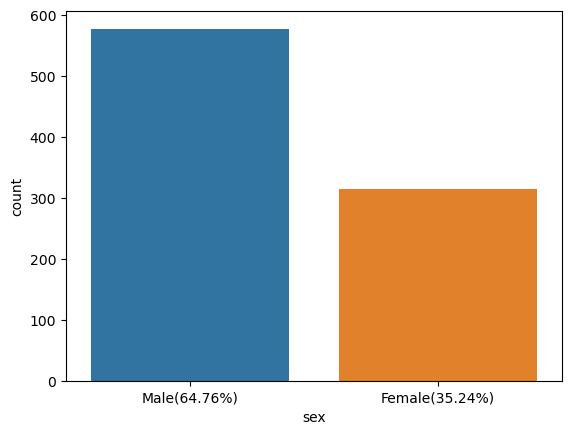

In [8]:
fig=sns.countplot(x=df.sex,data=df)
fig.set_xticklabels(["Male(64.76%)","Female(35.24%)"])


# 3.did the survival rate differ by gender? if so, how much?

In [9]:
a=df[df["survived"]==1]
a.groupby("sex")["survived"].count()


sex
female    233
male      109
Name: survived, dtype: int64

In [10]:
male_survival_rate = (109/(891))*100
female_survival_rate = (233/(891))*100

In [11]:
print(f"Survival rate differ by Gender on the titanic: {female_survival_rate-male_survival_rate:.2f}%")
print(f"Male survival rate is: {male_survival_rate:.2f}%")
print(f"Female survival rate is: {female_survival_rate:.2f}%")

Survival rate differ by Gender on the titanic: 13.92%
Male survival rate is: 12.23%
Female survival rate is: 26.15%


# 4. what was the age distribution among on the titanic

In [12]:
age = df["age"].describe()

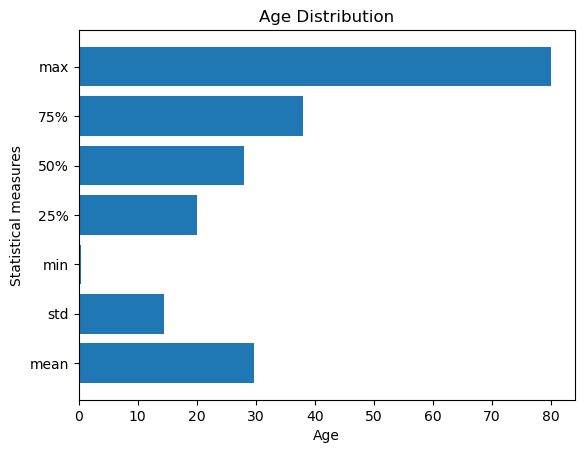

In [13]:
plot.barh(age.index[1:],age.values[1:])
plot.title("Age Distribution")
plot.ylabel("Statistical measures")
plot.xlabel("Age")
plot.show()

# 5. did the survival rate differ by th journey class? if so, how much

In [14]:
a=df.groupby("pclass")["survived"].value_counts()
a

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [18]:
a=list(a)
index=["Pclass 1","Pclass 2","Pclass 3"]
values=[a[0],a[3],a[-1]]
print(f"The survival rate of class 1: {(values[0]/sum(values))*100 : .2f}%")
print(f"The survival rate of class 2: {(values[1]/sum(values))*100 : .2f}%")
print(f"The survival rate of class 3: {(values[2]/sum(values))*100 : .2f}%")

The survival rate of class 1:  39.77%
The survival rate of class 2:  25.44%
The survival rate of class 3:  34.80%


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

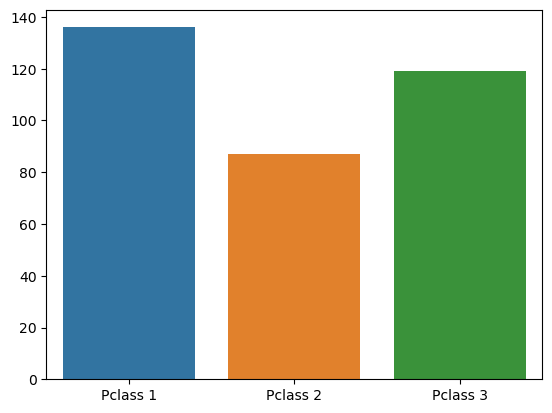

In [21]:
sns.barplot(index,values)